In [1]:
# set module
import pandas as pd


from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os

new_dir = "/content/drive/MyDrive/L2CS-Net"
os.chdir(new_dir)  # 현재 작업 디렉토리 변경
current_dir = os.getcwd()
print("현재 작업 디렉토리:", current_dir)

현재 작업 디렉토리: /content/drive/MyDrive/L2CS-Net


In [3]:
!pwd

/content/drive/MyDrive/L2CS-Net


In [4]:
## 패키지 설치
! pip install -r requirements.txt  


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! pip install git+https://github.com/elliottzheng/face-detection.git@master


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/elliottzheng/face-detection.git (to revision master) to /tmp/pip-req-build-ci9am5pb
  Running command git clone --filter=blob:none --quiet https://github.com/elliottzheng/face-detection.git /tmp/pip-req-build-ci9am5pb
  Resolved https://github.com/elliottzheng/face-detection.git to commit 786fbab7095623c348e251f1f0a8b323721c6a84
  Preparing metadata (setup.py) ... done


In [6]:
# 스크립트 활
# !python demo_video.py \
#  --snapshot models/L2CSNet_gaze360.pkl \
#  --gpu 0

In [7]:
# import numpy as np
# from demo_video import get_gaze_predictions

# # get_gaze_predictions 함수 호출하여 pitch_predicted_list와 yaw_predicted_list 얻기
# video_path = './datasets/bad_test.mp4' ## 반복문으로 돌려서 넣음 될듯
# snapshot_path = 'models/L2CSNet_gaze360.pkl'
# arch = 'ResNet50'
# gpu_id = '0'
# pitch_predicted_list, yaw_predicted_list = get_gaze_predictions(video_path, snapshot_path, arch, gpu_id)

# # 값들을 파일에 저장
# # np.save("pitch_predicted_list.npy", pitch_predicted_list)
# # np.save("yaw_predicted_list.npy", yaw_predicted_list)

import numpy as np
from main import get_gaze_predictions

# 비디오 파일 리스트
# video_paths = ['./datasets/bad_test1.mp4', './datasets/bad_test2.mp4', './datasets/bad_test3.mp4']
video_paths = ['./datasets/good_test.mp4']
snapshot_path = 'models/L2CSNet_gaze360.pkl'
arch = 'ResNet50'
gpu_id = '0'

for video_path in video_paths:
    # get_gaze_predictions 함수 호출하여 pitch_predicted_list와 yaw_predicted_list 얻기
    pitch_predicted_list, yaw_predicted_list, imputation = get_gaze_predictions(video_path, snapshot_path, arch, gpu_id)

    # 값들을 파일에 저장
    # np.save("pitch_predicted_list.npy", pitch_predicted_list)
    # np.save("yaw_predicted_list.npy", yaw_predicted_list)



Loading snapshot.


In [8]:
np.save("./gaze_vector/pitch_predicted/pitch_predicted_list_second.npy", pitch_predicted_list)
np.save("./gaze_vector/yaw_predicted/yaw_predicted_list_second.npy", yaw_predicted_list)

In [9]:
# pitch_predicted_list, yaw_predicted_list

In [10]:
imputation

80

In [11]:
import math

def calculate_euclidean_distance(point1, point2):
    # 점의 개수가 같은지 확인
    if len(point1) != len(point2):
        raise ValueError("The dimensions of the points do not match.")

    # 각 차원별로 제곱 차이를 계산하여 더함
    squared_diff = sum((coord1 - coord2)**2 for coord1, coord2 in zip(point1, point2))
    
    # 제곱 차이의 합에 루트를 씌워 유클리드 거리 계산
    distance = math.sqrt(squared_diff)
    return distance


In [12]:
# 유클리드 거리 계산
distance_list = []
for i in range(len(pitch_predicted_list) - 1):
    point1 = [pitch_predicted_list[i], yaw_predicted_list[i]]
    point2 = [pitch_predicted_list[i+1], yaw_predicted_list[i+1]]
    
    distance = calculate_euclidean_distance(point1, point2)
    distance_list.append(distance)

print(distance_list)


[1.7207439879340858, 1.6716374858052885, 1.5074156563981806, 3.5117738669086815, 2.7591222001641436, 2.8885880754033053, 2.5001204578535963, 1.0275005961775776, 0.989573447280079, 0.4135891203907006, 0.4789347995905306, 0.7953369162313353, 0.6909730140022498, 0.17254557482129676, 0.3922615149146583, 0.5435078018292333, 0.5458029610551526, 0.32870886479717054, 0.09980045697818264, 0.04907697302072021, 1.458734193013244, 1.9867997032195828, 0.04962716060069121, 0.9427074720912861, 1.0260877469218235, 0.13617805944962513, 0.27707591826391964, 0.08900486635162402, 0.061715741651867224, 0.3394640331569429, 0.17010037347822982, 0.5759549491354774, 0.9061009583498617, 0.6893765316203916, 0.14982820901151106, 0.40879863679847256, 0.11353105856828377, 1.0854939753576525, 0.20434953306750184, 0.20741425092274596, 0.8004613547179564, 1.0517542492090686, 0.038579855931754684, 0.7810430213300403, 1.2890308327239972, 0.8959861433119486, 0.513632056176852, 1.1875140092051113, 0.4895162279243606, 0.12

In [13]:
len(distance_list)

305

In [14]:
frame_count = 305 +1
total_time = 386

frame_time = total_time / frame_count

print(frame_time)

1.261437908496732


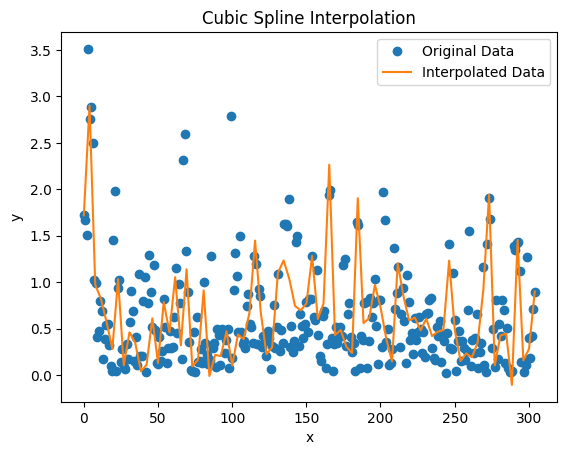

In [15]:
# import numpy as np
# from scipy.interpolate import CubicSpline
# import matplotlib.pyplot as plt

# x = list(range(len(distance_list)))
# y = distance_list

# cs = CubicSpline(x, y)
# interpolated_x = np.linspace(min(x), max(x), num=imputation)
# interpolated_y = cs(interpolated_x)

# plt.plot(x, y, 'o', label='Original Data')
# plt.plot(interpolated_x, interpolated_y, label='Interpolated Data')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Cubic Spline Interpolation')
# plt.legend()
# plt.show()

In [16]:
len(interpolated_y)

80

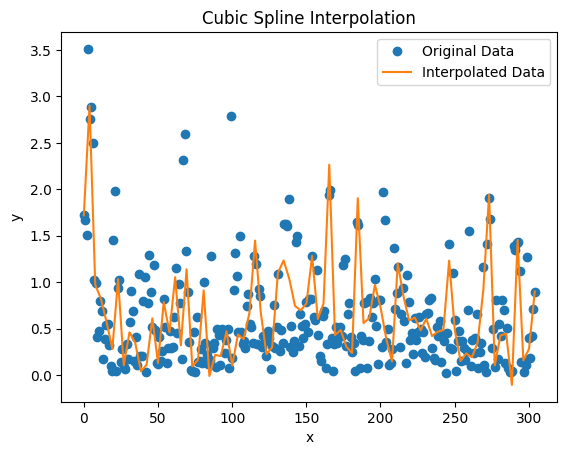

In [17]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = list(range(len(distance_list)))
y = distance_list

cs = CubicSpline(x, y)
interpolated_x = np.linspace(min(x), max(x), num=imputation)
interpolated_y = cs(interpolated_x)

# 원본 데이터와 보간한 데이터를 순서에 맞게 삽입하여 새로운 리스트 생성
new_x = list(range(len(distance_list)+imputation))
new_y = []
i = 0
for j in range(len(x)):
    new_y.append(y[j])
    if i < len(interpolated_x) and x[j] >= interpolated_x[i]:
        new_y.append(interpolated_y[i])
        i += 1

plt.plot(x, y, 'o', label='Original Data')
plt.plot(interpolated_x, interpolated_y, label='Interpolated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()
